# Understanding the structure of digital images

<style type="text/css">
    .exercise {
        border: solid 3px #AAE;
        background: #EEF;
        padding: 50px 10px 50px 10px;
        display: inline-block;
        font-size: 110%;
    }
</style>

Start by loading libraries we'll need, and we'll set the default figure size to be a little larger

In [1]:
%pylab inline
from matplotlib import cm
#plt.rcParams['figure.figsize'] = (8, 8)

Populating the interactive namespace from numpy and matplotlib


Define a function to load images

In [3]:
def image_load(fname, max_size=1200):
    """Load an image, downsampling if needed to keep within requested size.
    """
    img = plt.imread(fname)
    shape = np.array(img.shape, dtype=float)
    sample_fac = int(np.ceil((shape/max_size).max()))
    if sample_fac > 1:
        new_img = img[::sample_fac, ::sample_fac, ...]
        print ('Downsampling %sX:'% sample_fac, img.shape, '->', new_img.shape)
        return new_img
    else:
        return img

Now we define the file we're going to load and read it as an image

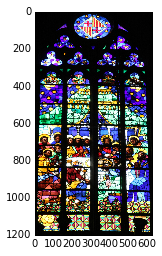

In [5]:
fname = 'data/stained_glass_barcelona.png'
#fname = 'data/dessert.png'

img = image_load(fname)
plt.imshow(img);

We can directly display the original file in the notebook

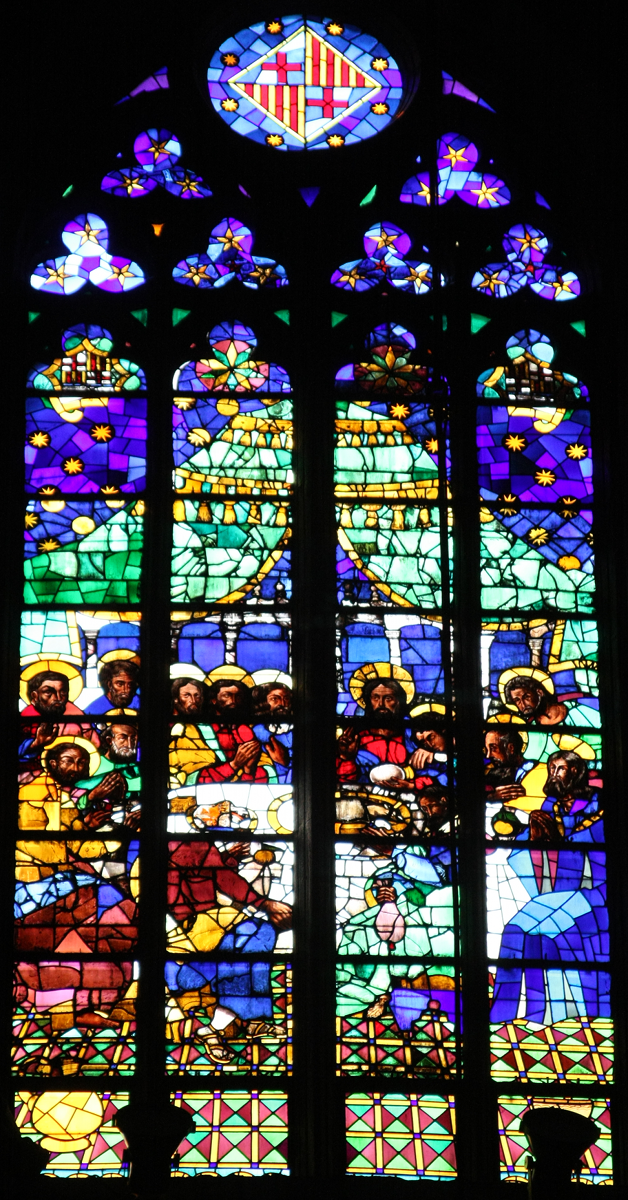

In [6]:
from IPython.core.display import Image
Image(filename=fname)

Extract each color channel and create a figure with 4 subplots, one for each
channel, so we can see its structure clearly.
</br>
Display the full color figure and the color channels

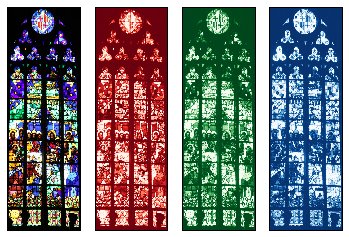

In [7]:
red, green, blue = [ img[:,:,i] for i in range(3) ]

f, axes = plt.subplots(1, 4, sharex=True, sharey=True)

axes[0].imshow(img)
axes[1].imshow(red, cmap=cm.Reds_r)
axes[2].imshow(green, cmap=cm.Greens_r)
axes[3].imshow(blue, cmap=cm.Blues_r)

# Turn off tick labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')

Make a new figure and display luminosity and per-channel histograms

PNG images sometimes have a 4th transparency channel, sometimes not.  To
be safe, we generate a luminosity array consisting of only the first 3
channels.

In [8]:
lumi = img[:,:,:3].mean(axis=2)

Now, display a histogram for each channel.  Note that jpeg images come
back as integer images with a luminosity range of 0..255 while pngs are
read as floating point images in the 0..1 range.  So we adjust the
histogram range accordingly:

In [9]:
hrange = (0.0, 1.0) if lumi.max()<=1.0 else (0.0, 255.0)

Display the luminosity and per-channel histograms:

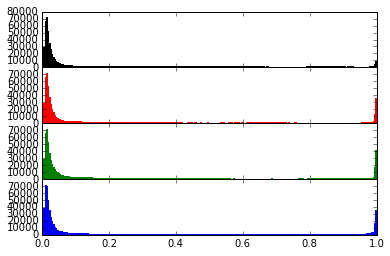

In [10]:
f2, axes2 = plt.subplots(4, 1, sharex=True)

axes2[0].hist(lumi.flatten(), 256, range=hrange, facecolor='k', edgecolor='k')
axes2[1].hist(red.flatten(), 256, range=hrange, facecolor='r', edgecolor='r')
axes2[2].hist(green.flatten(), 256, range=hrange, facecolor='g', edgecolor='g')
axes2[3].hist(blue.flatten(), 256, range=hrange, facecolor='b', edgecolor='b');
f2.subplots_adjust(hspace=0);

# We want the x tick labels to be invisible on all but the bottom figure
for ax in axes2[:-1]:
    for label in ax.get_xticklabels():
        label.set_visible(False)

# Don't show the last y label in plots 2-4:
for ax in axes2[1:]:
    ax.get_yticklabels()[-1].set_visible(False)

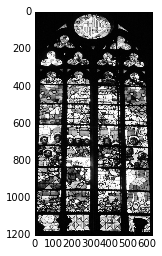

In [11]:
imshow(lumi, cmap=cm.Greys_r);

Let's do a slightly different encoding of the color channels: 30% red, 59% green, 11% blue

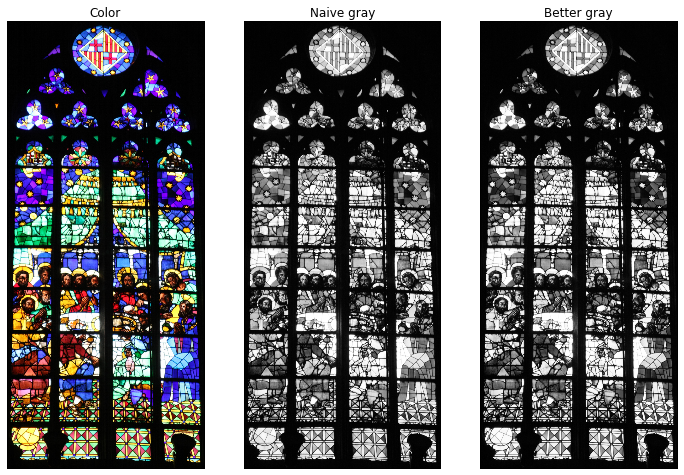

In [12]:
lumi2 = .3*red + .59*green + 0.11*blue

fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharex=True, sharey=True)

axes[0].imshow(img); axes[0].set_title('Color')
axes[1].imshow(lumi, cmap=cm.Greys_r); axes[1].set_title('Naive gray')
axes[2].imshow(lumi2, cmap=cm.Greys_r); axes[2].set_title('Better gray')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')